In [2]:
# import statements
import pandas as pd
from pandas import DataFrame
from numpy import nan
import csv
from matplotlib import pyplot as plt
import os

In [10]:
# read the assay files and load the data into a data frame
def load_df(filename):
    f = open(filename)
    data_raw = f.read()
    f.close()

    data1 = data_raw.split('\n')
    data2 = data1[1:]
    header = data1[0]
    indices = header.split('\t')
    data3 = [i.split('\t') for i in data2]
    data = DataFrame(data3, columns = indices)
    data = data.replace('', nan)
    data = data.replace('None', nan)
    data = data.dropna()
    df = data.iloc[:150] # trim to consider about 24 hrs
    for col in df: # type conversions for all columns
        if col == 'Time' or col == 'T 500':
            continue
        df.loc[:,col] = df[col].astype(float)
    return df    

In [34]:
# works for 384 (16x24) welled plate
def graph_df(df, red = []):
    fig, ax = plt.subplots(nrows = 16, ncols = 24, sharex = True, sharey = True, figsize = (20, 20))
    cols = list(df.columns[2:])
    for col in df.columns[2:]: # exclude the non-well columns
        # print(col, end=' ')
        index = cols.index(col)
        ax[index//24][index%24].plot(df.index, df[col])
        ax[index//24][index%24].get_xaxis().set_visible(False)
        ax[index//24][index%24].get_yaxis().set_visible(False)
    
    for col in red:
        index = cols.index(col)
        ax[index//24][index%24].set_facecolor('xkcd:light pastel green')
        
#         if col in red:
#             ax[index//24][index%24].set_facecolor('red')

In [35]:
# inspect 4 wells
def inspect_well(df, w1, w2, w3, w4):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (4,4))
    ax[0,0].plot(df.index, df[w1])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,1].plot(df.index, df[w2])
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].get_yaxis().set_visible(False)
    ax[1,0].plot(df.index, df[w3])
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].get_yaxis().set_visible(False)
    ax[1,1].plot(df.index, df[w4])
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].get_yaxis().set_visible(False)

In [30]:
files = ["data/"+item for item in os.listdir("data") if item.endswith('.txt')]
files

['data/Rutuja 04 06.txt',
 'data/Rutuja 04 08.txt',
 'data/Rutuja 04 09.txt',
 'data/Rutuja 04 10.txt',
 'data/Rutuja 04 28.txt',
 'data/Rutuja 04 30.txt',
 'data/Rutuja 05 03.txt',
 'data/Rutuja 05 05.txt',
 'data/Rutuja 11 02.txt']

In [31]:
df1 = load_df(files[4])
print(files[4])
df2 = load_df(files[5])
print(files[5])
df3 = load_df(files[7])
print(files[7])
df4 = load_df(files[8])
print(files[8])

data/Rutuja 04 28.txt
data/Rutuja 04 30.txt
data/Rutuja 05 05.txt
data/Rutuja 11 02.txt


In [32]:
string = '''
 "I2"  "C3"  "F3"  "P3"  "C4"  "E4"  "F4"  "H4"  "J4"  "O4"  "D5"  "F5"  "H5" 
 "I5"  "M5"  "B6"  "H6"  "F7"  "J7"  "O7"  "A8"  "P9"  "A11" "B12" "P12" "D13"
 "J13" "B15" "P15" "J17" "L17" "J18" "P18" "O19" "G21" "M21" "L23" "C24"
 '''
l = string.replace('"', "").split()
l = list(set(l))
len(l)

38

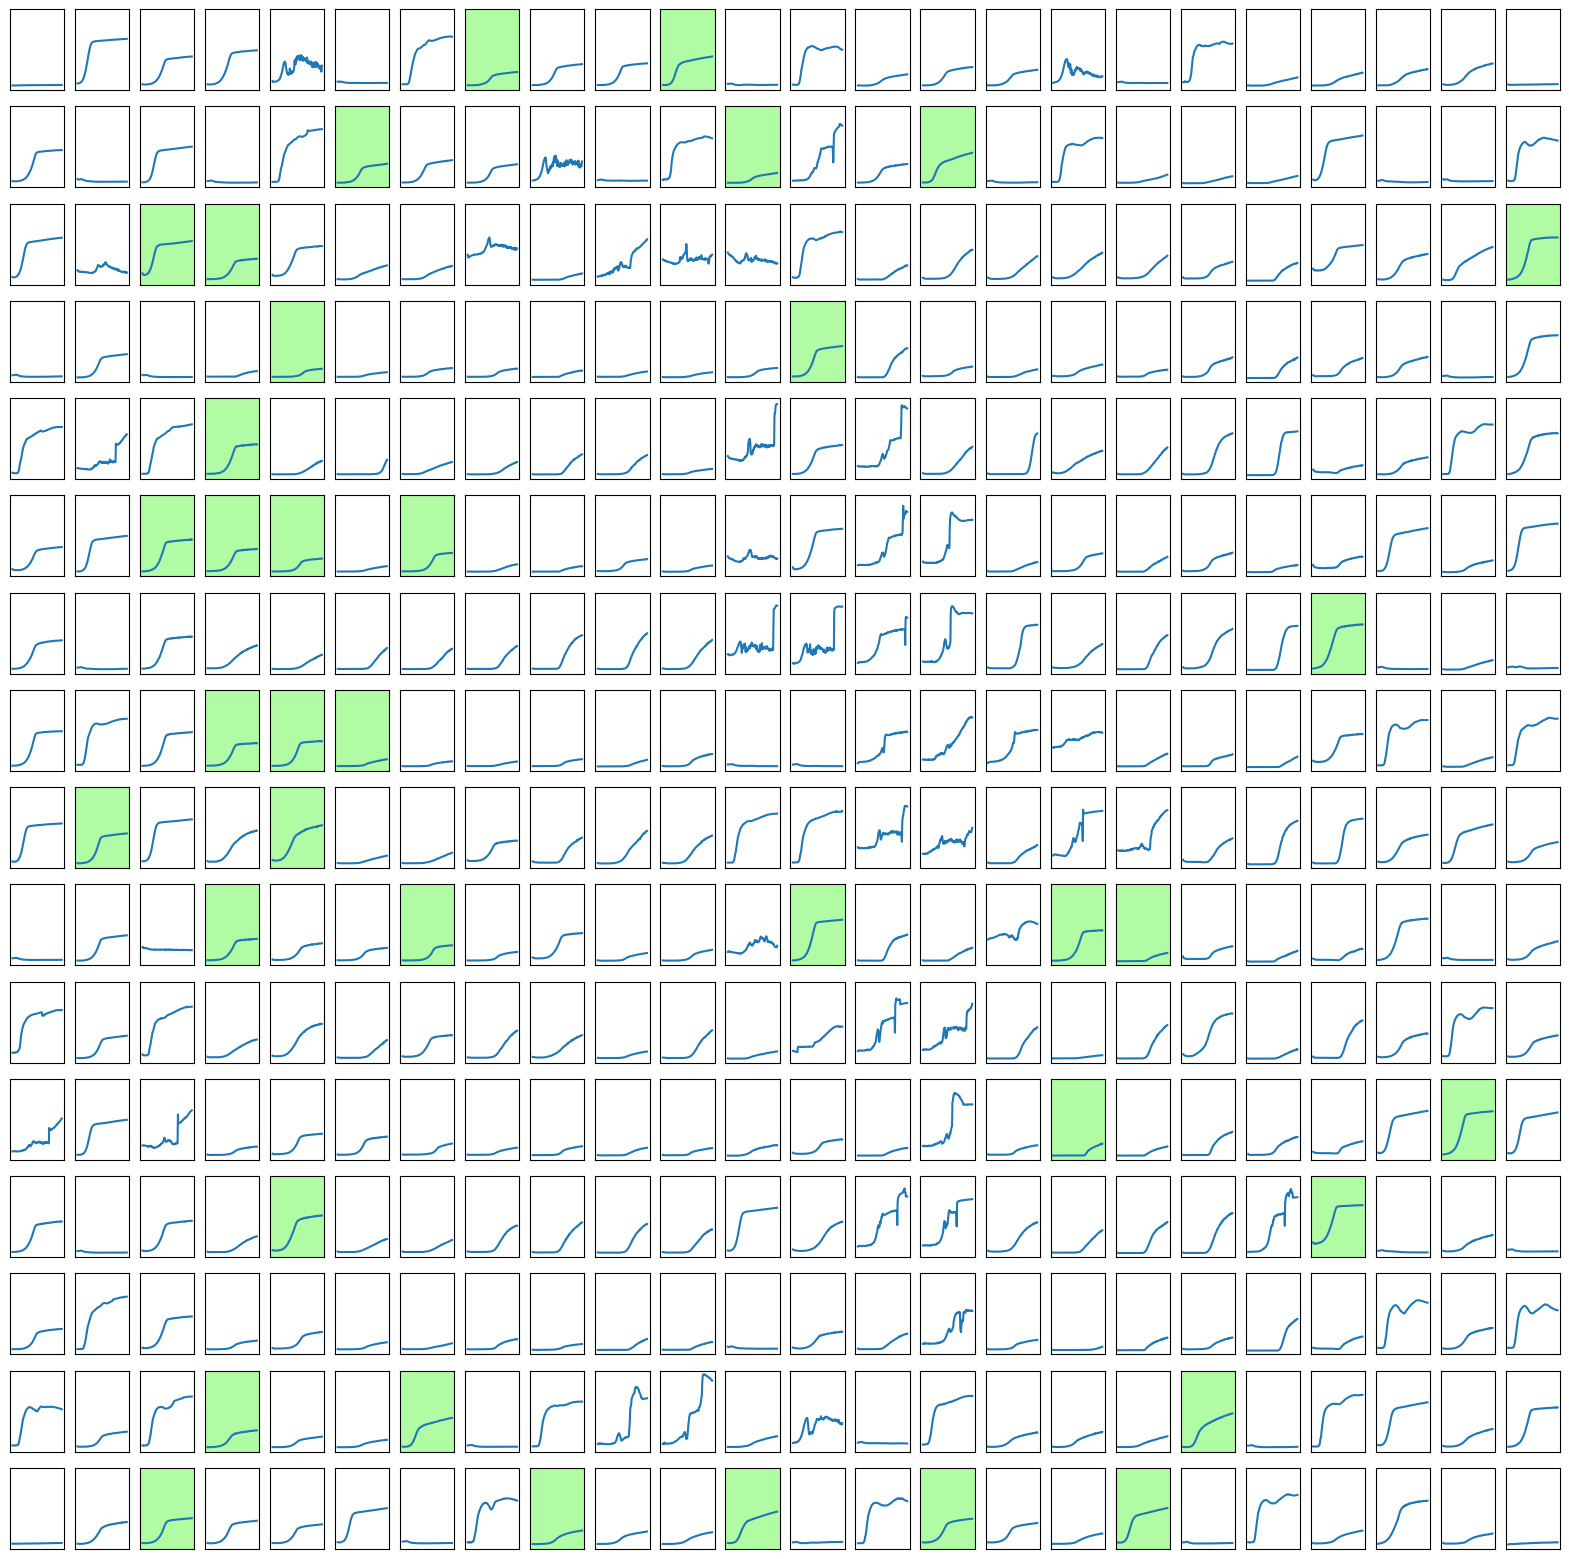

In [36]:
graph_df(df1, l)

In [37]:
string = '''
"F1"  "L1"  "O2"  "F3"  "L3"  "P3"  "C4"  "D4"  "E4"  "F4"  "G4"  "H4"  "I4"  "J4"  "K4"  "L4"  "M4"  "N4"  "O4"  "C5"  "D5" 
 "E5"  "F5"  "G5"  "H5"  "I5"  "J5"  "L5"  "N5"  "B6"  "C6"  "D6"  "E6"  "F6"  "H6"  "J6"  "K6"  "L6"  "M6"  "N6"  "C7"  "E7" 
  "F7"  "G7"  "H7"  "J7"  "K7"  "L7"  "M7"  "N7"  "A8"  "C8"  "D8"  "E8"  "F8"  "G8"  "H8"  "I8"  "K8"  "L8"  "M8"  "N8"  "C9" 
 "D9"  "E9"  "F9"  "G9"  "H9"  "M9"  "N9"  "P9"  "C10" "D10" "E10" "F10" "G10" "H10" "J10" "K10" "L10" "M10" "N10" "O10" "C11"
  "D11" "E11" "F11" "G11" "H11" "I11" "J11" "K11" "L11" "M11" "N11" "D12" "E12" "F12" "J12" "D13" "N13" "A14" "F15" "P15" "D16"
"H16" "N16" "O16" "F17" "H17" "K17" "M17" "N17" "B18" "F18" "I18" "J18" "K18" "L18" "N18" "A19" "E19" "F19" "G19" "H19" "I19"
"J19" "K19" "L19" "M19" "N19" "E20" "F20" "G20" "H20" "I20" "J20" "K20" "L20" "M20" "N20" "C21" "D21" "E21" "F21" "G21" "H21"
"I21" "J21" "K21" "L21" "M21" "N21" "P21" "C22" "I22" "F23" "L23" "O23" "I24"
 '''
l = string.replace('"', "").split()
l = list(set(l))
len(l)

160

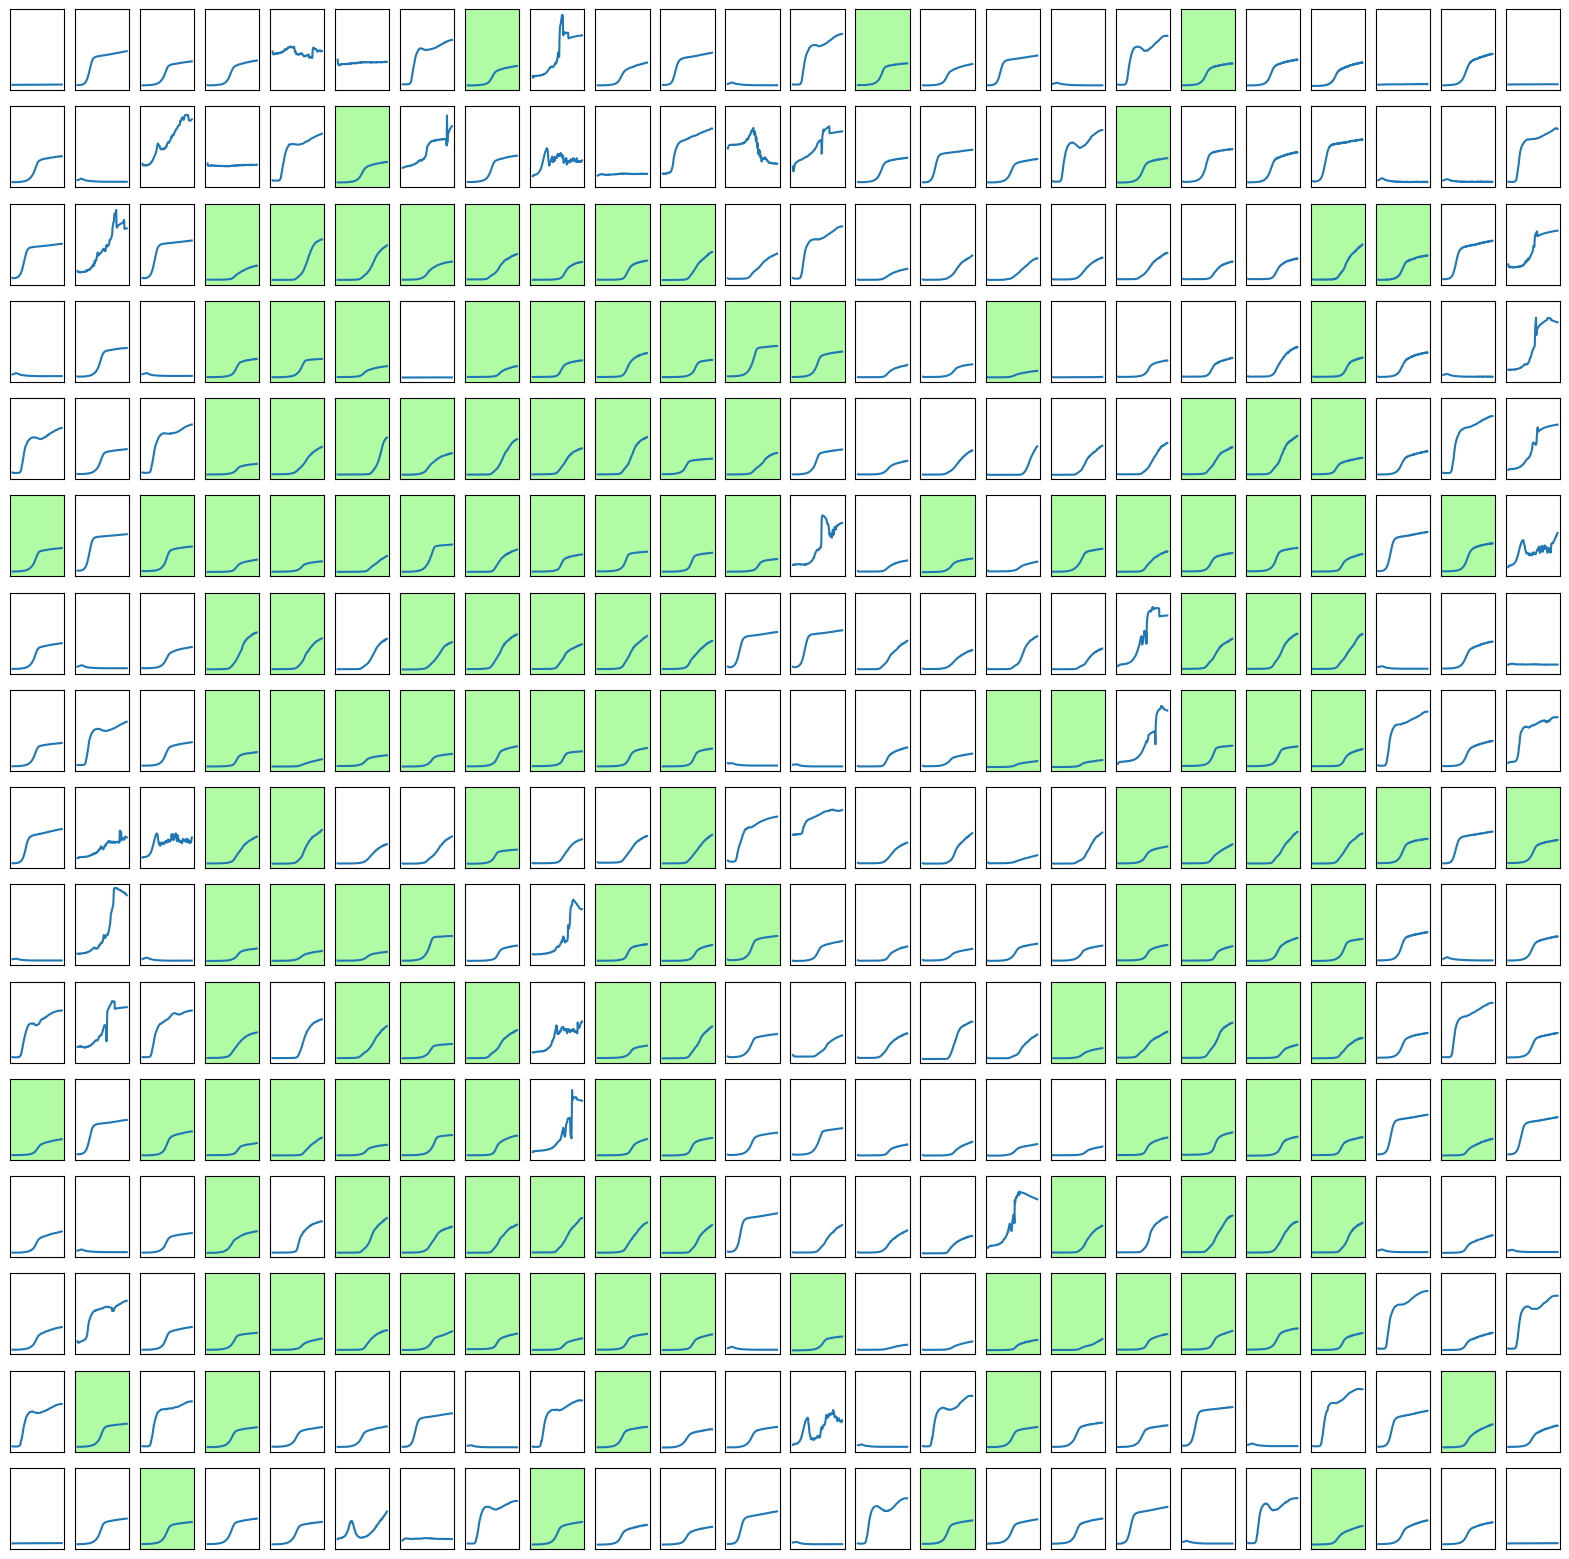

In [38]:
graph_df(df2, l)

In [39]:
string = '''
 "F1"  "L1"  "C2"  "I2"  "O2"  "F3"  "L3"  "P3"  "D4"  "E4"  "F4"  "G4"  "H4"  "N4"  "O4"  "C5"  "D5"  "E5"  "F5"  "G5"  "H5" 
  "I5"  "J5"  "K5"  "L5"  "M5"  "N5"  "B6"  "C6"  "D6"  "E6"  "F6"  "H6"  "I6"  "J6"  "K6"  "L6"  "M6"  "N6"  "D7"  "F7"  "G7" 
  "H7"  "J7"  "M7"  "N7"  "A8"  "C8"  "H8"  "K8"  "L8"  "C9"  "D9"  "E9"  "F9"  "G9"  "H9"  "I9"  "J9"  "K9"  "L9"  "M9"  "N9" 
  "P9"  "C10" "D10" "E10" "F10" "G10" "H10" "I10" "J10" "K10" "L10" "M10" "N10" "O10" "D11" "E11" "F11" "G11" "H11" "I11" "J11"
  "K11" "L11" "M11" "N11" "B12" "C12" "D12" "F12" "J13" "K13" "L13" "N13" "A14" "C14" "D14" "E14" "F14" "G14" "H14" "M14" "N14"
"C15" "D15" "E15" "F15" "G15" "I15" "J15" "K15" "L15" "M15" "N15" "P15" "C16" "F16" "G16" "H16" "I16" "J16" "K16" "L16" "M16"
 "N16" "O16" "D17" "G17" "H17" "I17" "J17" "K17" "M17" "N17" "C18" "H18" "I18" "J18" "K18" "L18" "M18" "C19" "D19" "E19" "F19"
 "G19" "H19" "I19" "K19" "L19" "M19" "N19" "A20" "C20" "E20" "F20" "G20" "H20" "I20" "J20" "K20" "M20" "N20" "E21" "G21" "H21"
 "J21" "K21" "L21" "M21" "N21" "P21" "C22" "I22" "F23" "L23" "O23" "C24" "I24"
 '''
l = string.replace('"', "").split()
l = list(set(l))
len(l)

181

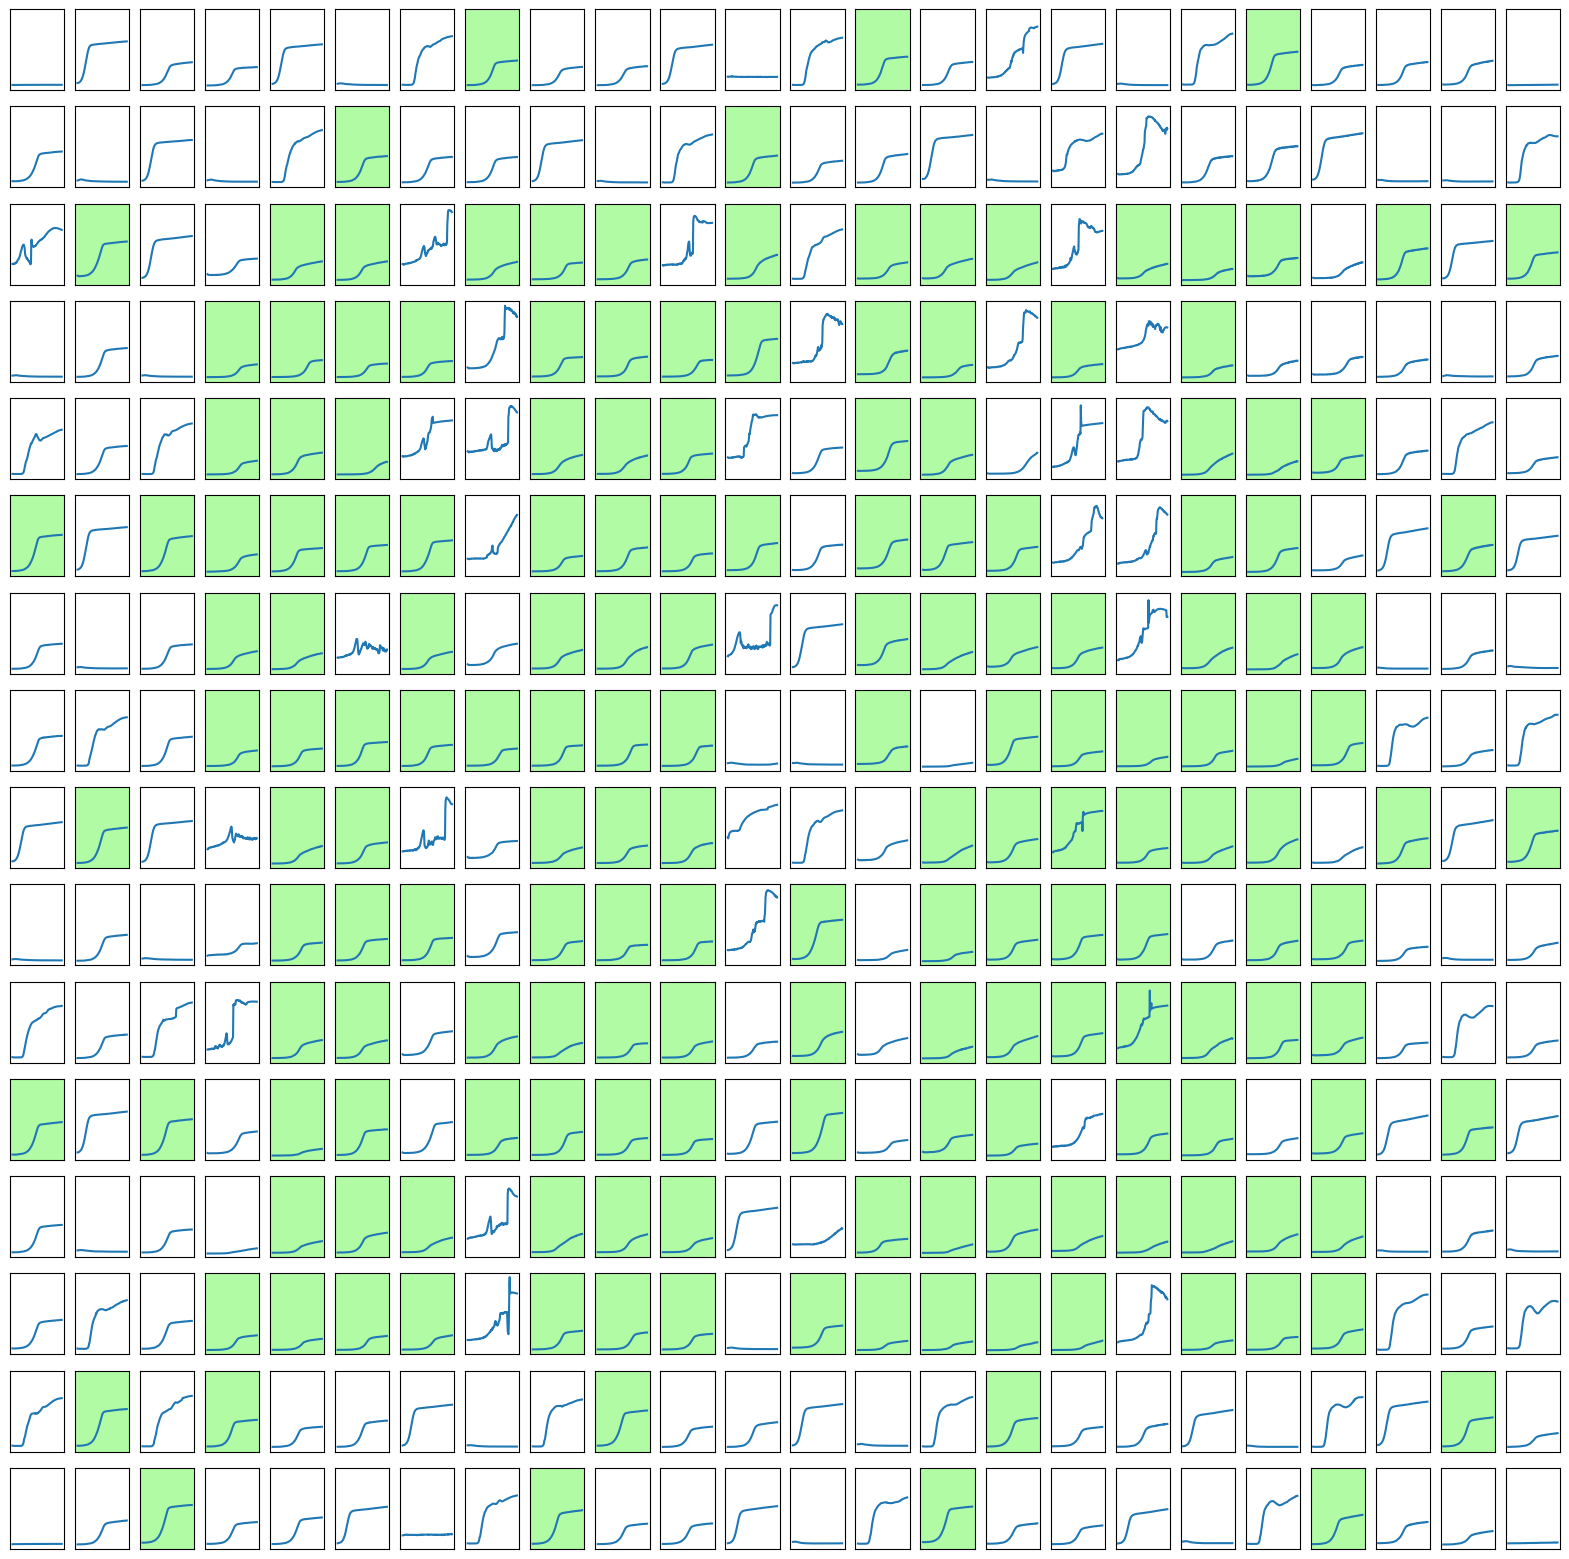

In [40]:
graph_df(df3, l)

In [41]:
string = '''
    "B1"  "C1"  "D1"  "E1"  "F1"  "H1"  "I1"  "K1"  "L1"  "M1"  "N1"  "O1"  "B2"  "C2"  "E2"  "F2"  "H2"  "I2"  "M2"  "N2"  "B3" 
  "C3"  "D3"  "E3"  "F3"  "H3"  "K3"  "L3"  "M3"  "N3"  "O3"  "A4"  "B4"  "C4"  "D4"  "E4"  "F4"  "I4"  "J4"  "K4"  "L4"  "M4" 
 "N4"  "O4"  "P4"  "A5"  "B5"  "C5"  "D5"  "E5"  "F5"  "G5"  "H5"  "I5"  "J5"  "K5"  "L5"  "M5"  "N5"  "O5"  "P5"  "A6"  "B6" 
 "C6"  "N6"  "O6"  "P6"  "A7"  "B7"  "C7"  "N7"  "O7"  "P7"  "A8"  "B8"  "C8"  "N8"  "O8"  "P8"  "D9"  "E9"  "F9"  "G9"  "H9" 
 "I9"  "J9"  "K9"  "L9"  "M9"  "P9"  "A10" "B10" "C10" "D10" "E10" "F10" "G10" "H10" "I10" "J10" "K10" "L10" "M10" "N10" "O10"
 "P10" "A11" "B11" "C11" "D11" "E11" "F11" "G11" "I11" "J11" "K11" "M11" "N11" "O11" "B12" "C12" "D12" "E12" "F12" "G12" "H12"
 "I12" "J12" "K12" "L12" "M12" "N12" "O12" "P12" "B13" "C13" "D13" "E13" "F13" "G13" "H13" "I13" "J13" "K13" "L13" "M13" "N13"
 "O13" "P13" "B14" "C14" "D14" "E14" "F14" "G14" "H14" "I14" "J14" "L14" "N14" "O14" "P14" "B15" "C15" "D15" "E15" "F15" "K15"
 "L15" "M15" "N15" "O15" "A16" "B16" "C16" "N16" "O16" "P16" "B17" "C17" "N17" "O17" "P17" "A18" "B18" "C18" "N18" "O18" "P18"
"A19" "B19" "C19" "D19" "E19" "F19" "G19" "H19" "I19" "J19" "K19" "L19" "M19" "O19" "P19" "A20" "B20" "C20" "D20" "E20" "F20"
 "G20" "I20" "J20" "K20" "L20" "M20" "N20" "O20" "P20" "B22" "C22" "D22" "H22" "I22" "K22" "B23" "C23" "D23" "E23" "F23" "H23"
 "I23" "O23" "H24"
 '''
l = string.replace('"', "").split()
l = list(set(l))
len(l)

234

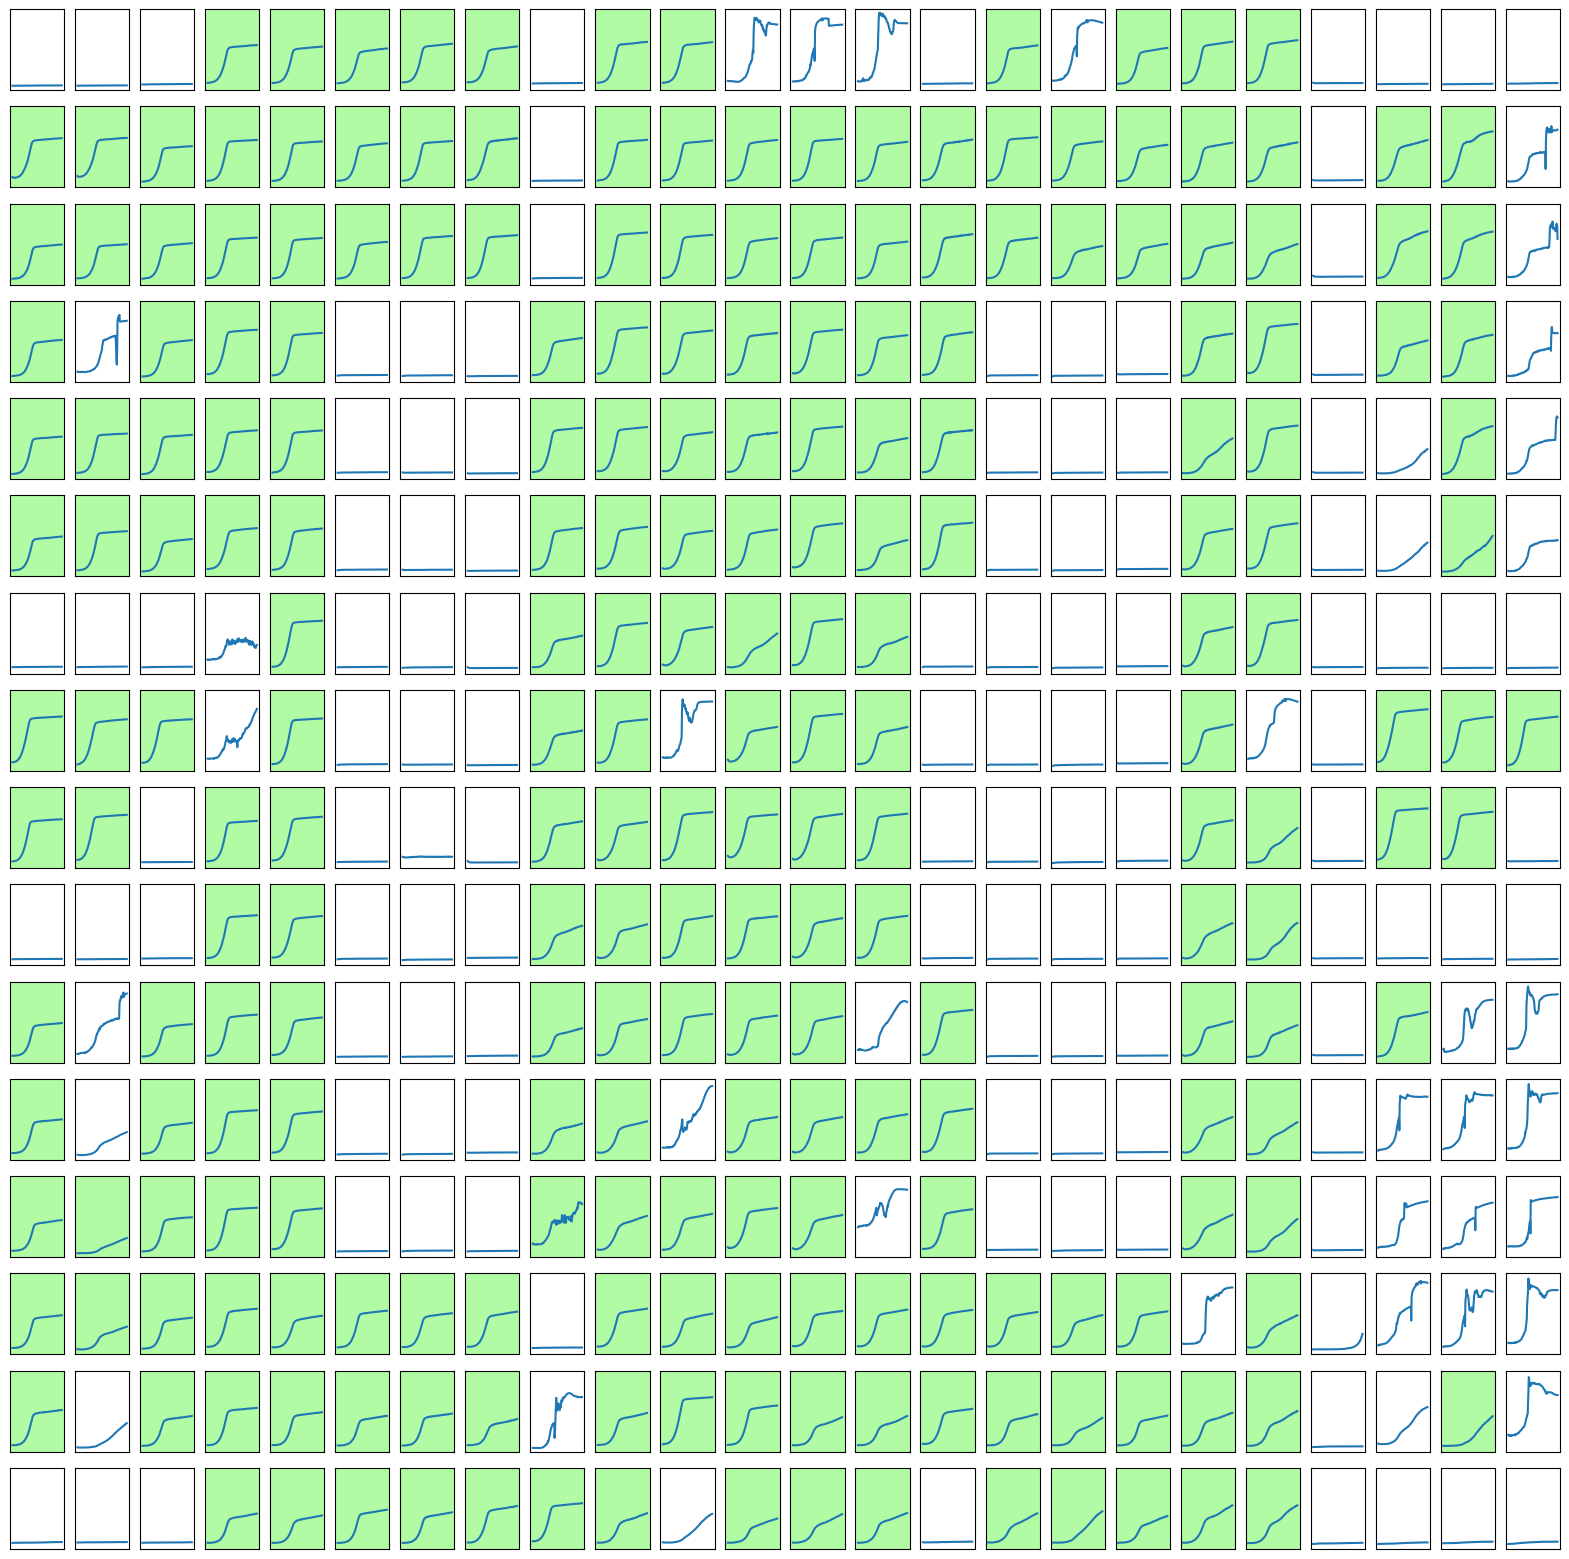

In [42]:
graph_df(df4, l)

In [17]:
string = '''
  "A1"  "C1"  "D1"  "E1"  "I1"  "J1"  "K1"  "O1"  "P1"  "A2"  "F2"  "G2"  "H2" 
  "J2"  "K2"  "L2"  "M2"  "N2"  "C3"  "D3"  "E3"  "I3"  "J3"  "K3"  "O3"  "B4" 
 "A5"  "B5"  "K5"  "M5"  "A6"  "A7"  "O7"  "O8"  "P8"  "A9"  "B9"  "J9"  "L9" 
  "O9"  "B10" "A11" "B11" "A12" "G12" "H12" "I12" "M12" "P12" "A13" "B13" "C13"
 "F13" "G13" "H13" "O13" "P13" "N14" "O14" "P14" "B15" "K15" "O15" "A16" "M16"
  "A17" "B17" "A18" "G18" "H18" "M18" "P18" "O19" "P19" "O20" "P20" "B21" "O21"
  "A22" "F22" "G22" "H22" "L22" "M22" "N22" "O22" "B23" "C23" "D23" "E23" "I23"
  "K23" "A24" "B24" "D24" "E24" "G24" "H24" "L24" "M24" "N24" "P24"
 '''
l = string.replace('"', "").split()
l = list(set(l))

In [18]:
len(l)

102

A1 A2 A3 A4 A5 A6 A7 A8 A9 A10 A11 A12 A13 A14 A15 A16 A17 A18 A19 A20 A21 A22 A23 A24 B1 B2 B3 B4 B5 B6 B7 B8 B9 B10 B11 B12 B13 B14 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C20 C21 C22 C23 C24 D1 D2 D3 D4 D5 D6 D7 D8 D9 D10 D11 D12 D13 D14 D15 D16 D17 D18 D19 D20 D21 D22 D23 D24 E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14 E15 E16 E17 E18 E19 E20 E21 E22 E23 E24 F1 F2 F3 F4 F5 F6 F7 F8 F9 F10 F11 F12 F13 F14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F24 G1 G2 G3 G4 G5 G6 G7 G8 G9 G10 G11 G12 G13 G14 G15 G16 G17 G18 G19 G20 G21 G22 G23 G24 H1 H2 H3 H4 H5 H6 H7 H8 H9 H10 H11 H12 H13 H14 H15 H16 H17 H18 H19 H20 H21 H22 H23 H24 I1 I2 I3 I4 I5 I6 I7 I8 I9 I10 I11 I12 I13 I14 I15 I16 I17 I18 I19 I20 I21 I22 I23 I24 J1 J2 J3 J4 J5 J6 J7 J8 J9 J10 J11 J12 J13 J14 J15 J16 J17 J18 J19 J20 J21 J22 J23 J24 K1 K2 K3 K4 K5 K6 K7 K8 K9 K10 K11 K12 K13 K14 K15 K16 K17 K18 K19 K20 K21 K22 K23 K24 L1 L2 L3 L4 L5 L6 L7 L8 L9 L10 L11 L12 L13 

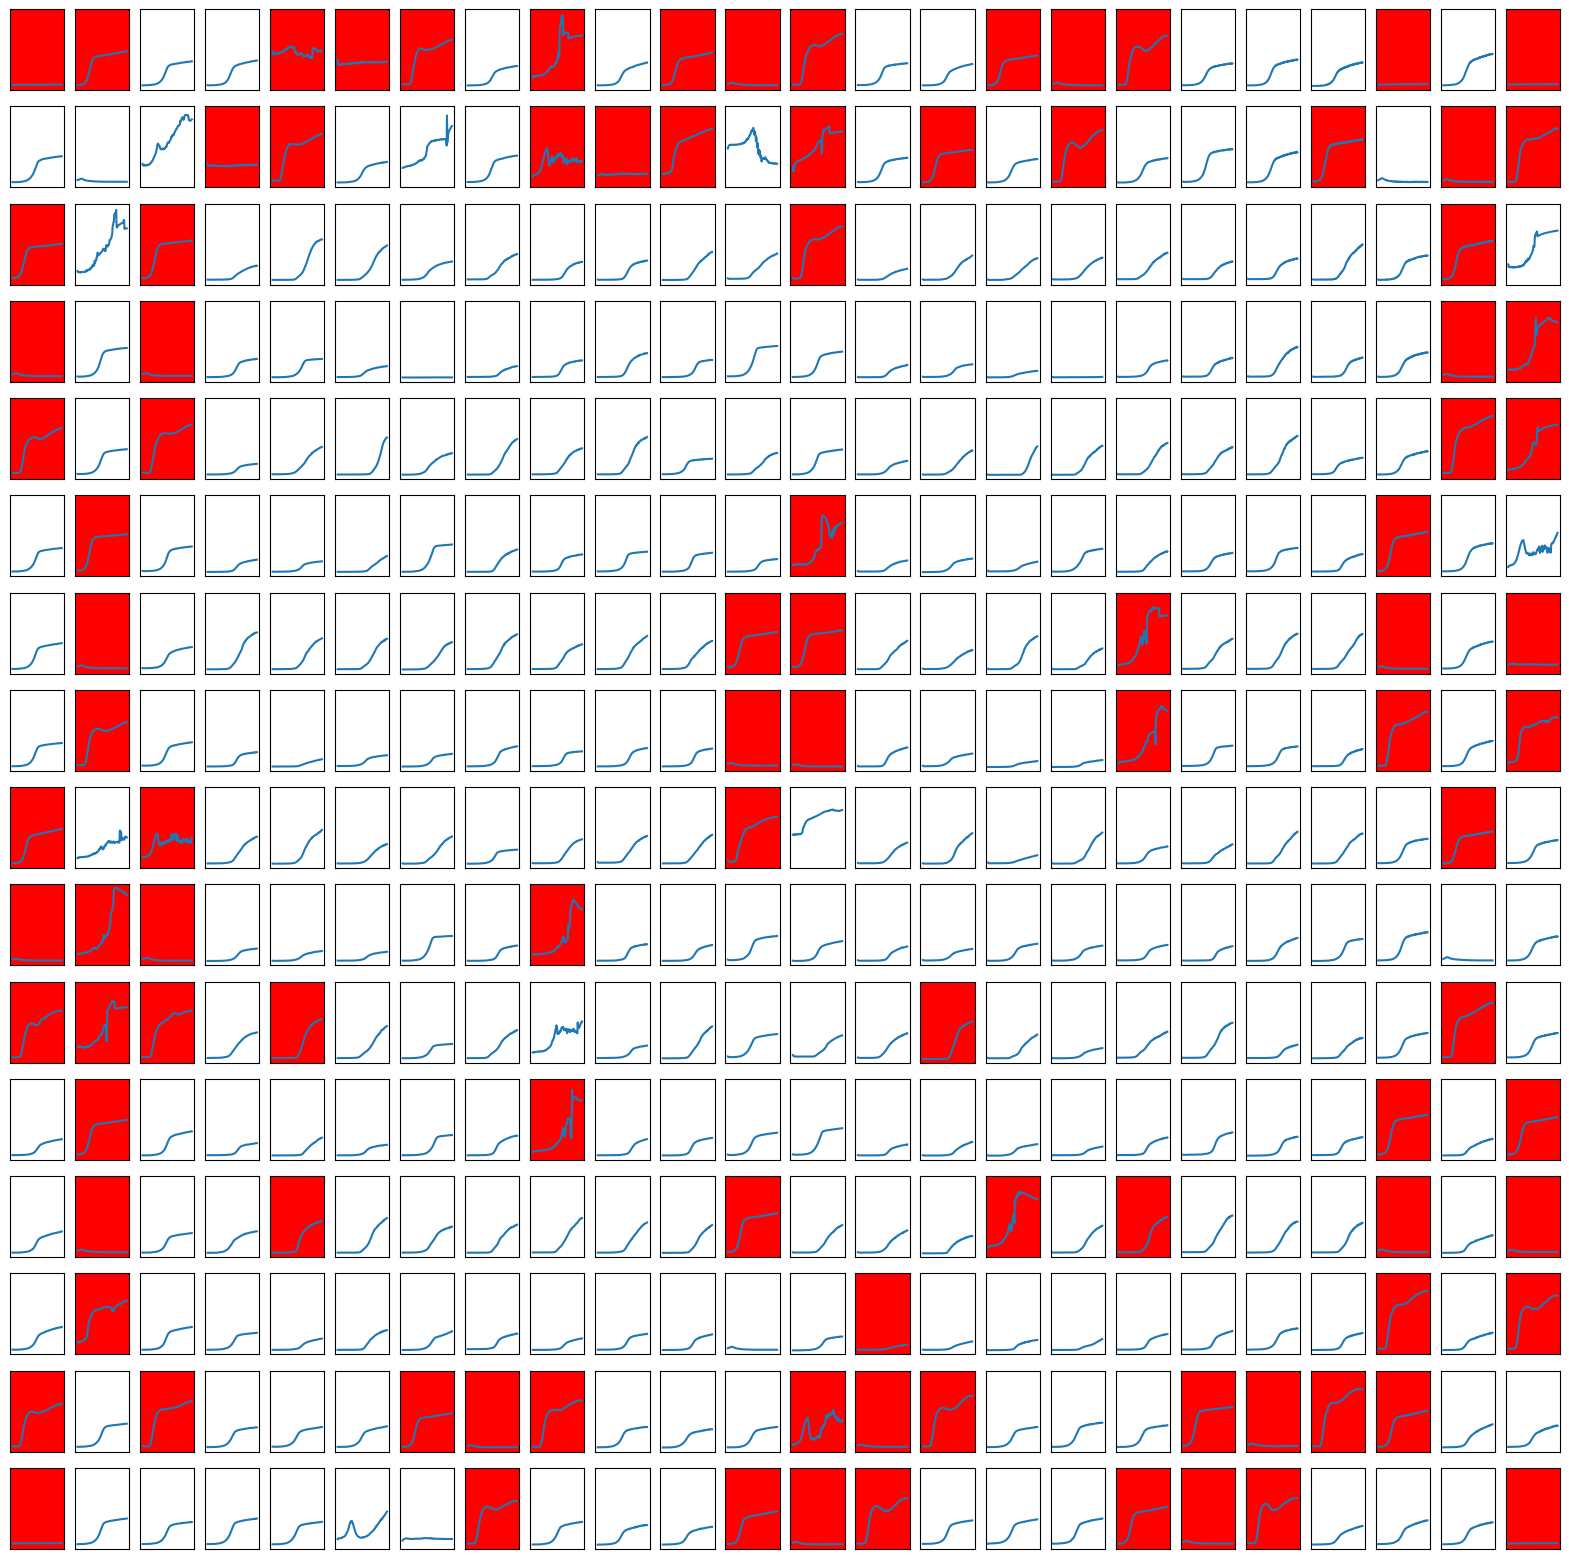

In [19]:
graph_df(df2, l)

In [57]:

string = '''
  D1 E1 F1 J1 K1 L1 O1 B2 C2 E2 G2 H2 M2 O2 D3 J3 K3 L3 O3 B4 D4 G4 I4 K4 L4 M4 N4 A5 C5 E5 G5 J5 K5 L5 N5 O5 A6 C6 D6 E6 G6 I6 J6 K6 L6 M6 N6 O6 A7 C7 D7 E7 G7 H7 I7 K7 L7 M7 N7 P7 C8 D8 E8 F8 G8 H8 I8 J8 K8 L8 M8 N8 O8 P8 B9 C9 D9 E9 F9 G9 H9 I9 J9 K9 L9 M9 N9 B10 C10 D10 E10 F10 G10 H10 I10 J10 K10 L10 M10 N10 O10 B11 C11 D11 E11 F11 G11 H11 I11 J11 K11 L11 M11 N11 O11 A12 C12 D12 E12 F12 G12 H12 I12 J12 K12 L12 N12 O12 A13 B13 C13 F13 G13 H13 I13 K13 L13 M13 N13 O13 P13 A14 C14 D14 E14 F14 I14 J14 K14 L14 M14 N14 O14 P14 C15 D15 E15 F15 G15 H15 I15 J15 K15 L15 N15 O15 B16 C16 D16 E16 F16 G16 I16 J16 K16 L16 M16 N16 O16 A17 B17 C17 D17 E17 F17 G17 H17 I17 K17 M17 N17 O17 A18 B18 C18 D18 E18 F18 G18 H18 I18 K18 L18 M18 N18 O18 A19 B19 C19 D19 E19 F19 G19 H19 I19 J19 K19 L19 M19 N19 P19 A20 B20 C20 D20 E20 F20 G20 H20 I20 J20 K20 L20 M20 N20 O20 P20 A21 C21 D21 E21 F21 H21 I21 J21 K21 L21 N21 O21 P21 A22 B22 C22 D22 E22 G22 H22 I22 K22 M22 N22 A23 B23 C23 D23 E23 F23 G23 H23 J23 K23 M23 N23 O23 P23 A24 B24 G24 H24 I24 J24 K24 M24 N24
 '''
l = string.split()
l = list(set(l))

In [58]:
len(l)

284

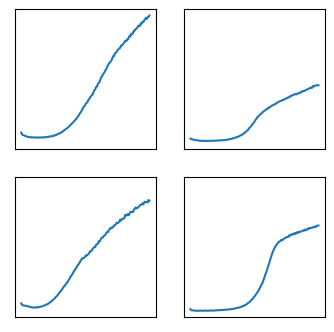

In [69]:
inspect_well(df1, 'C17', 'D17', 'E17', 'F17')

A1 A2 A3 A4 A5 A6 A7 A8 A9 A10 A11 A12 A13 A14 A15 A16 A17 A18 A19 A20 A21 A22 A23 A24 B1 B2 B3 B4 B5 B6 B7 B8 B9 B10 B11 B12 B13 B14 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C20 C21 C22 C23 C24 D1 D2 D3 D4 D5 D6 D7 D8 D9 D10 D11 D12 D13 D14 D15 D16 D17 D18 D19 D20 D21 D22 D23 D24 E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14 E15 E16 E17 E18 E19 E20 E21 E22 E23 E24 F1 F2 F3 F4 F5 F6 F7 F8 F9 F10 F11 F12 F13 F14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F24 G1 G2 G3 G4 G5 G6 G7 G8 G9 G10 G11 G12 G13 G14 G15 G16 G17 G18 G19 G20 G21 G22 G23 G24 H1 H2 H3 H4 H5 H6 H7 H8 H9 H10 H11 H12 H13 H14 H15 H16 H17 H18 H19 H20 H21 H22 H23 H24 I1 I2 I3 I4 I5 I6 I7 I8 I9 I10 I11 I12 I13 I14 I15 I16 I17 I18 I19 I20 I21 I22 I23 I24 J1 J2 J3 J4 J5 J6 J7 J8 J9 J10 J11 J12 J13 J14 J15 J16 J17 J18 J19 J20 J21 J22 J23 J24 K1 K2 K3 K4 K5 K6 K7 K8 K9 K10 K11 K12 K13 K14 K15 K16 K17 K18 K19 K20 K21 K22 K23 K24 L1 L2 L3 L4 L5 L6 L7 L8 L9 L10 L11 L12 L13 

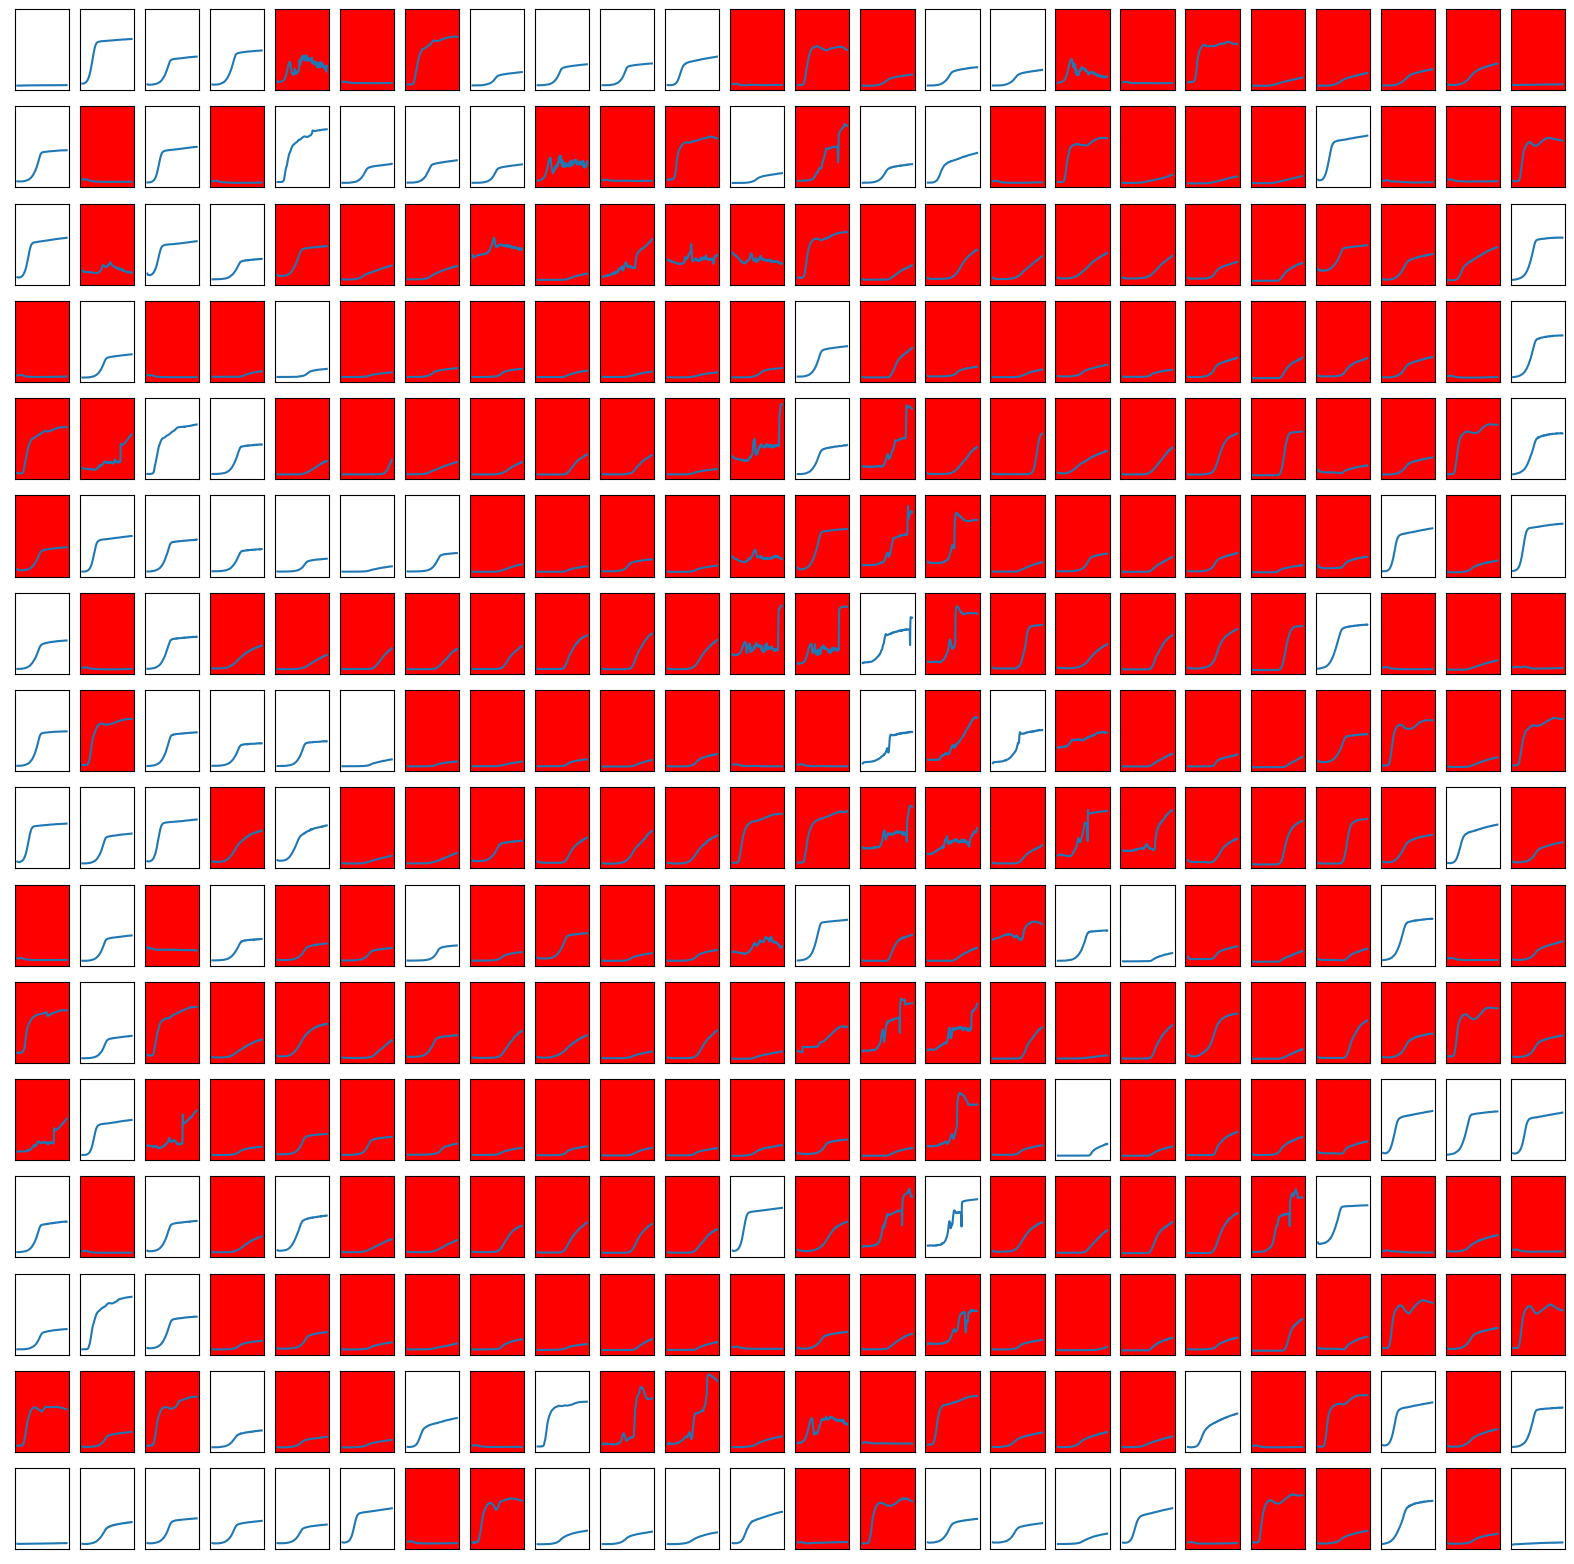

In [65]:
graph_df(df1, l)

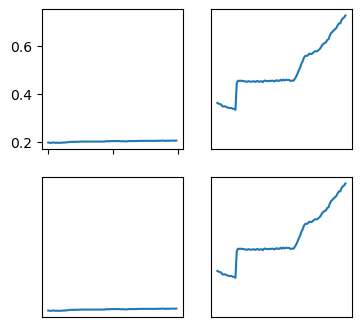

In [30]:
inspect_well(df1, 'A1', 'K13', 'A1', 'K13')

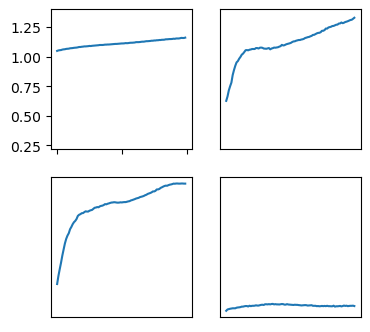

In [31]:
inspect_well(df3, 'O19', 'A19', 'O21', 'G22')

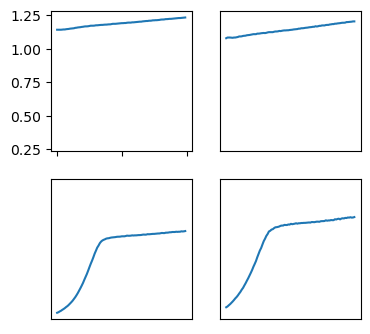

In [32]:
inspect_well(df3, 'L2', 'P12', 'E17', 'M17')

In [33]:
inspect_well(df6, 'A22', 'B22', 'B23', 'G24')

NameError: name 'df6' is not defined

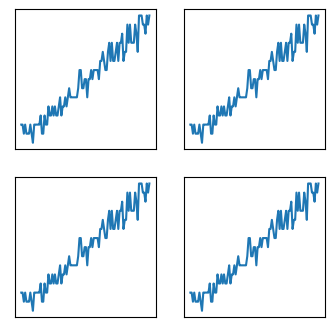

In [17]:
inspect_well(df8, 'P24', 'P24', 'P24', 'P24')

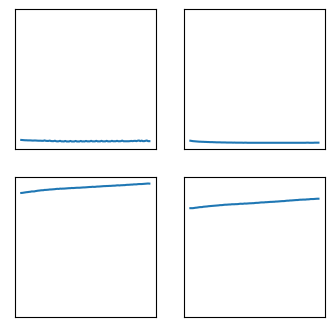

In [19]:
inspect_well(df7, 'D23', 'A18', 'G13', 'C1')

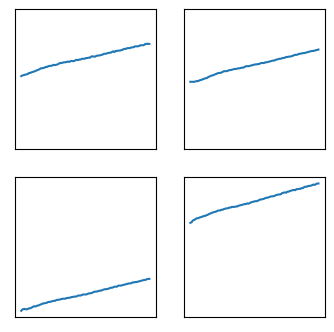

In [20]:
inspect_well(df7, 'I1', 'L2', 'P6', 'P18')

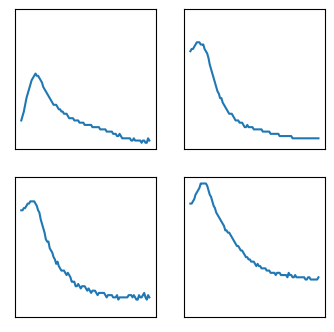

In [21]:
inspect_well(df8, 'D23', 'P13', 'J23', 'O14')

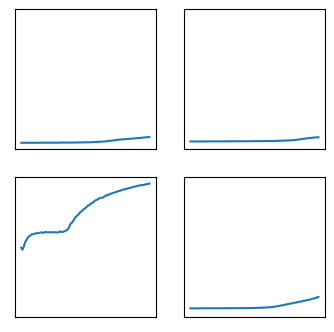

In [22]:
inspect_well(df8, 'M4', 'H15', 'I12', 'M19')

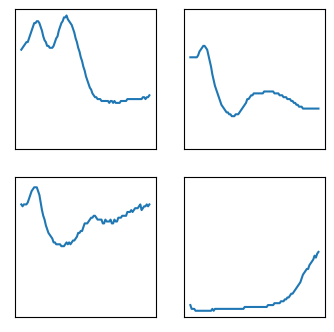

In [23]:
inspect_well(df5, 'G24', 'A12', 'P13', 'K17')

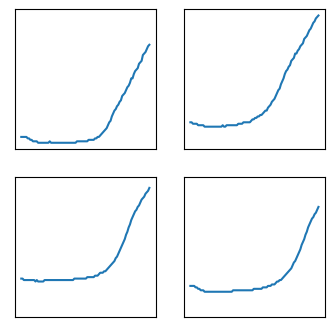

In [27]:
inspect_well(df5, 'B19', 'B18', 'D6', 'D11')

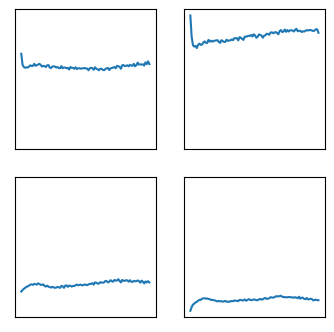

In [28]:
inspect_well(df6, 'B4', 'A6', 'B10', 'P7')

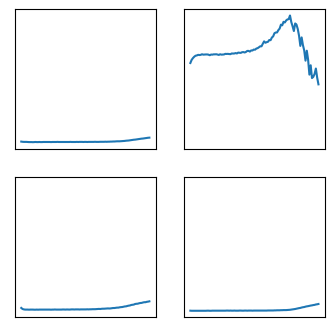

In [29]:
inspect_well(df6, 'N14', 'B12', 'I16', 'H5')

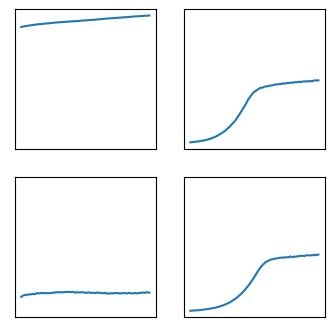

In [32]:
inspect_well(df7, 'M12', 'G6', 'M22', 'J10')

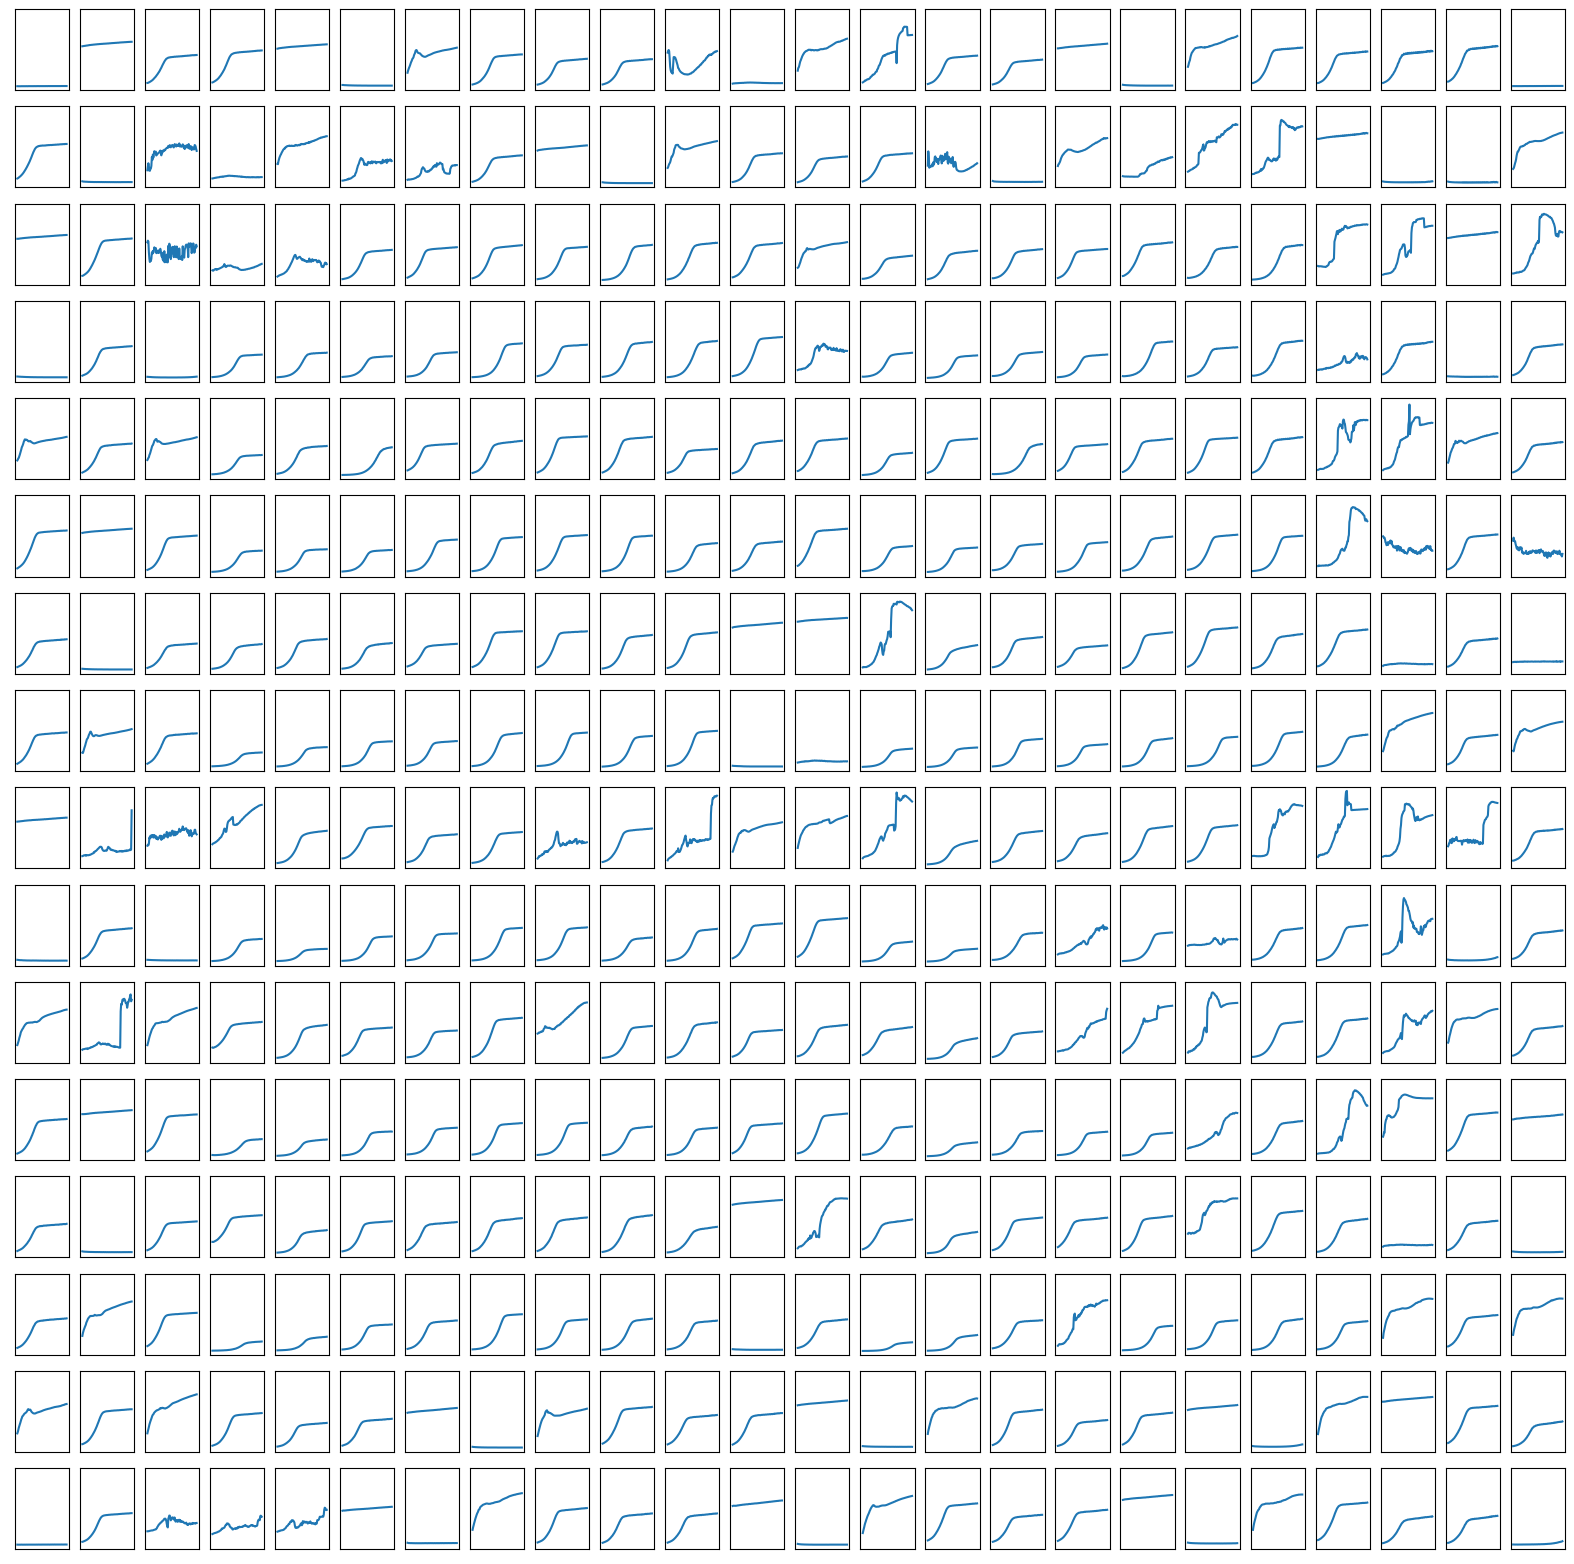

In [34]:
graph_df(df7)

In [12]:
string = '''
   "B1"  "D1"  "G1"  "H1"  "J1"  "M1"  "N1"  "P1"  "B2"  "D2"  "E2"  "G2"  "J2"  "K2"  "M2" 
 "P2"  "A3"  "G3"  "H3"  "M3"  "N3"  "A4"  "P4"  "O5"  "P5"  "A6"  "O6"  "B7"  "B8"  "A9" 
 "A10" "B10" "P10" "O11" "P11" "H12" "K12" "L12" "O12" "B13" "E13" "F13" "B14" "O14" "A15"
 "A16" "P16" "O17" "P17" "A18" "O18" "B19" "B20" "A21" "A22" "D22" "E22" "F22" "J22" "K22"
 "P22" "A23" "B23" "D23" "G23" "H23" "M23" "N23" "P23" "A24" "D24" "E24" "J24" "K24" "O24"
 "P24"
 '''
l = string.replace('"', "").split()
l = list(set(l))

In [7]:
string = '''
 "A1"  "C1"  "I1"  "K1"  "O1"  "A2"  "B2"  "F2"  "H2"  "I2"  "K2"  "L2"  "M2"  "N2" 
 "B3"  "C3"  "I3"  "K3"  "O3"  "P3"  "B4"  "A5"  "C5"  "A6"  "B6"  "P6"  "A7"  "B7" 
 "O7"  "P8"  "B9"  "I9"  "O9"  "A11" "I11" "A12" "G12" "H12" "I12" "M12" "P12" "A13"
 "D13" "G13" "H13" "I13" "M13" "O13" "P13" "A14" "G14" "I14" "O14" "P14" "O15" "A17"
 "J17" "N17" "A18" "P18" "A19" "B19" "K19" "M19" "O19" "B20" "I20" "O20" "P20" "B21"
 "C21" "D21" "E21" "F21" "I21" "L21" "O21" "C22" "E22" "F22" "H22" "I22" "J22" "K22"
 "L22" "M22" "N22" "O22" "B23" "C23" "D23" "E23" "I23" "K23" "A24" "B24" "C24" "F24"
 "G24" "H24" "L24" "N24"
 '''
l = string.replace('"', "").split()
l = list(set(l))

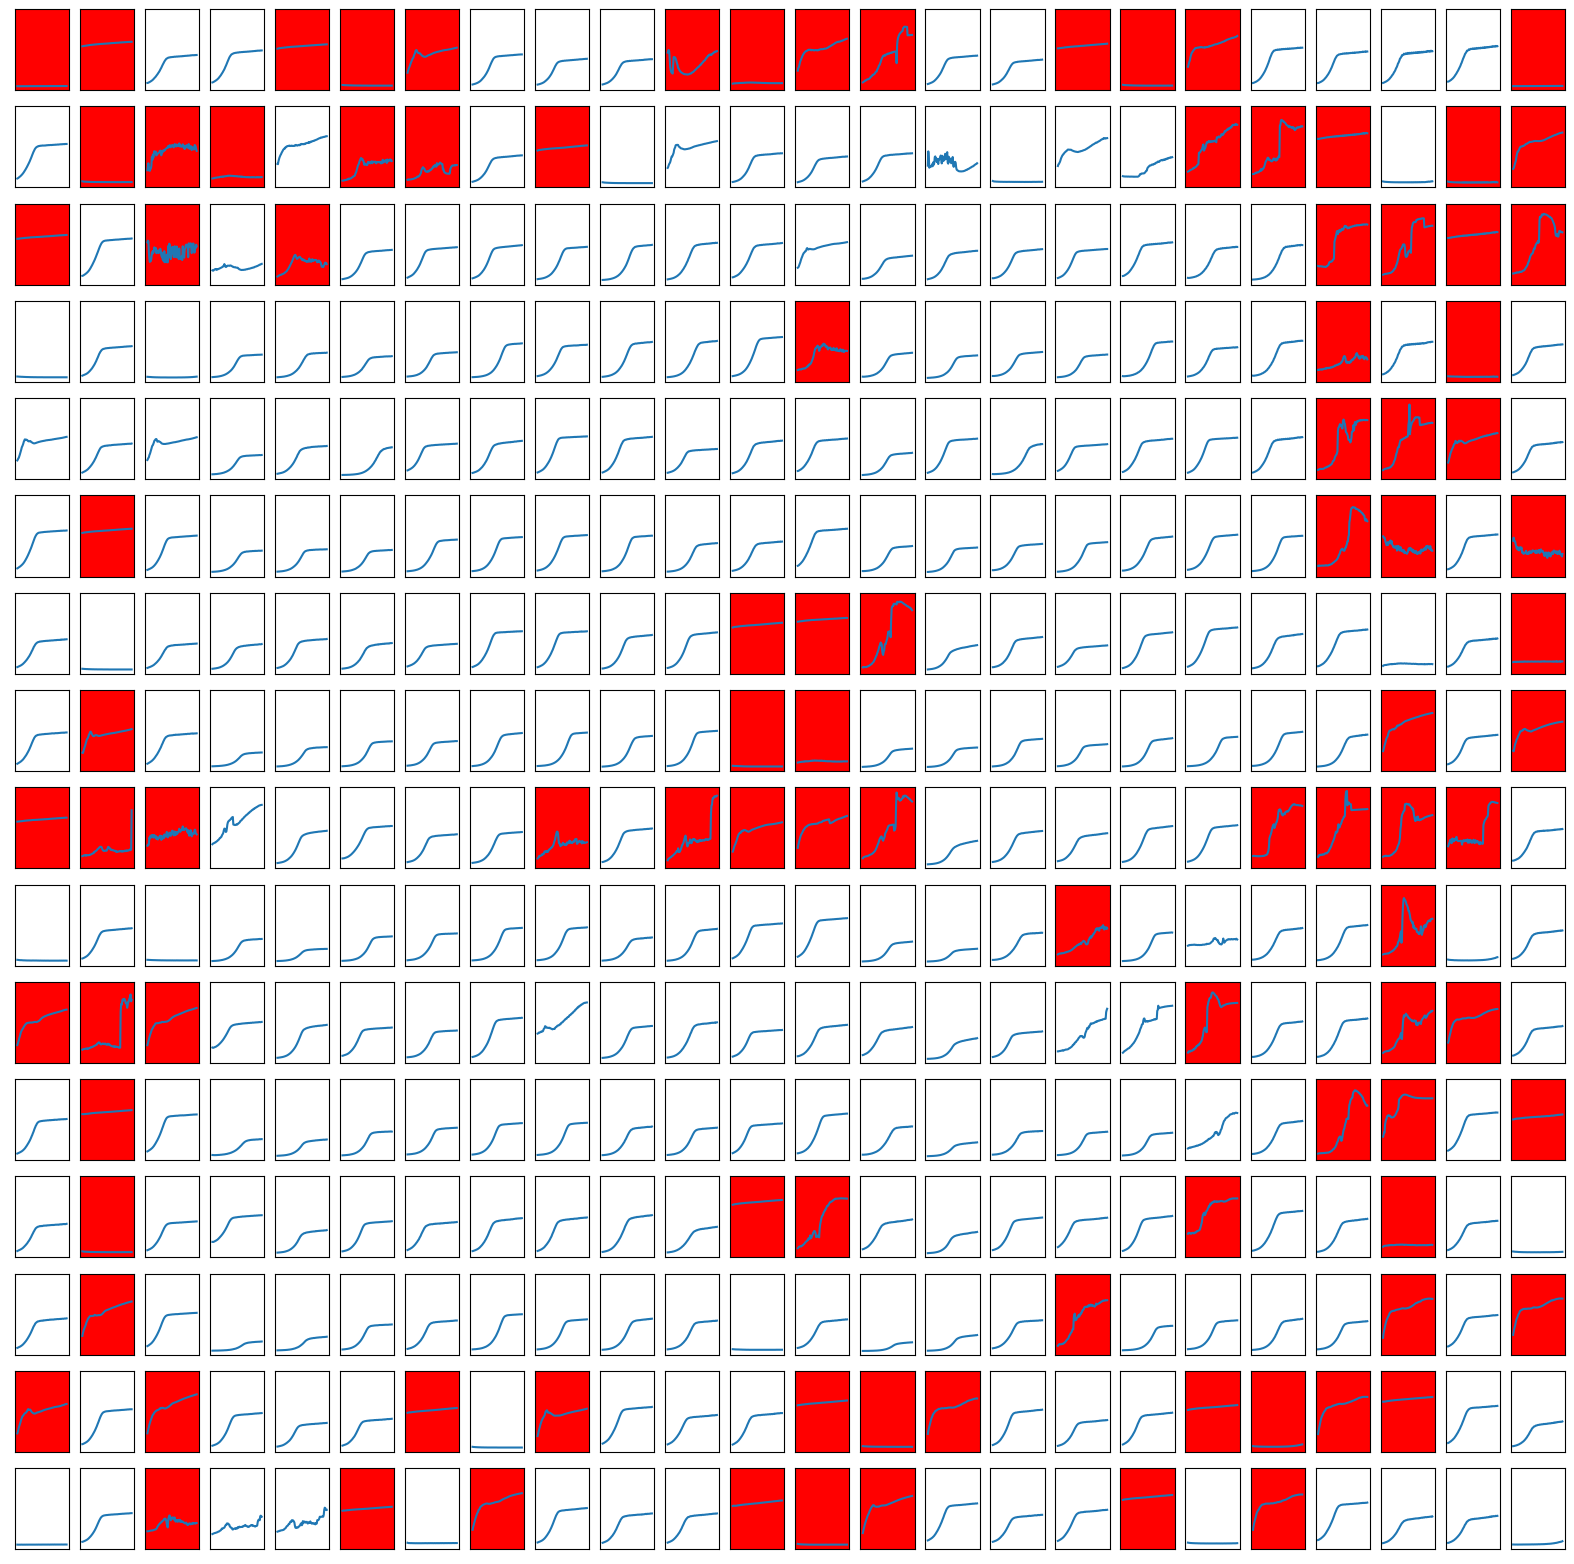

In [8]:
graph_df(df3, l)

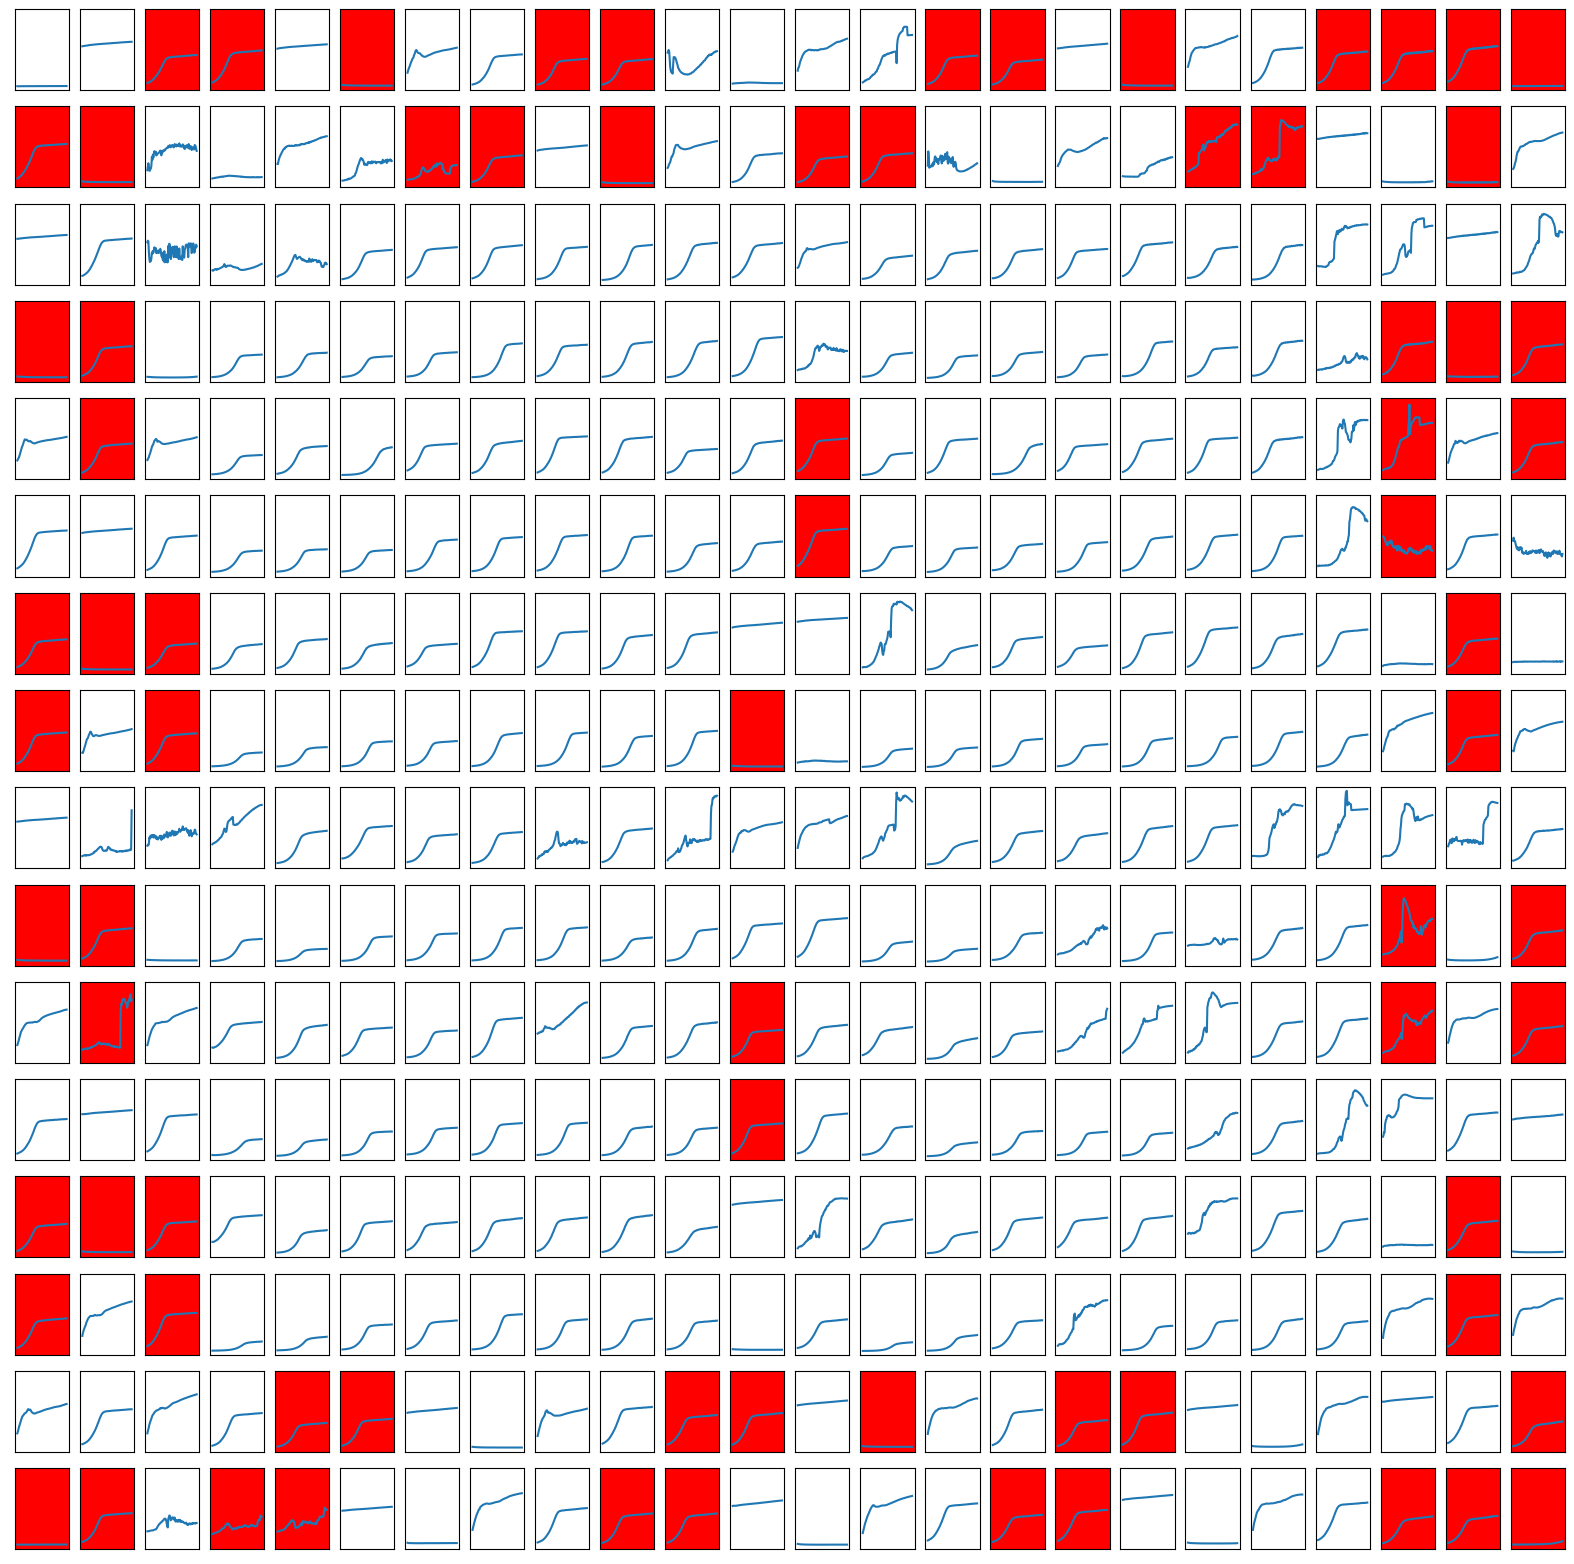

In [13]:
graph_df(df7, l)

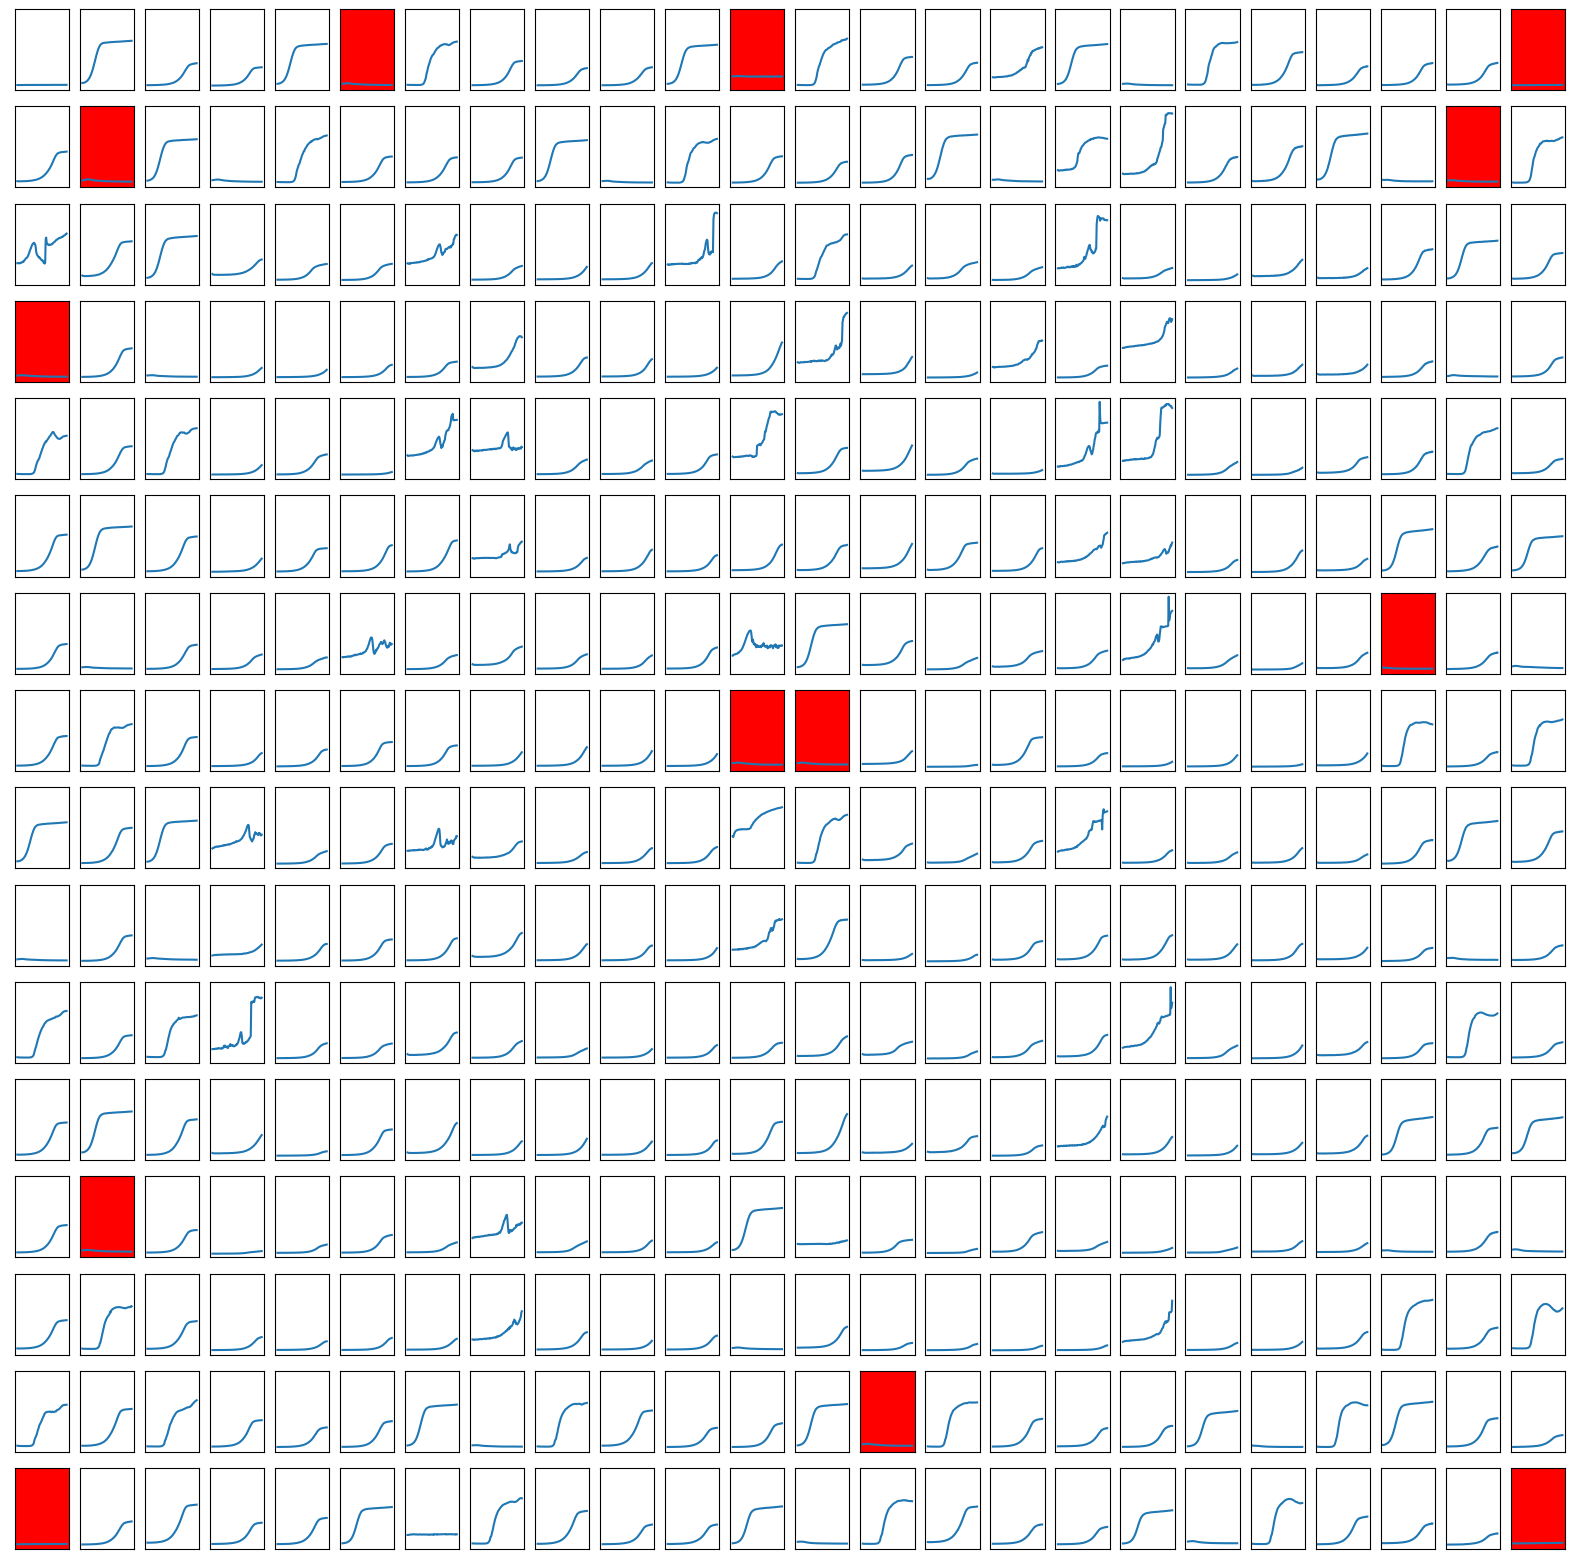

In [10]:
string = '''
 "D1"  "P1"  "B2"  "M2"  "A6"  "A12" "H12" "H13" "O14" "G22" "B23" "A24" "P24"
 '''
l = string.replace('"', "").split()
l = list(set(l))
graph_df(df8, l)